# UV continuum slope

This notebook demonstrates how to measure the UV continuum slope ($\beta$) from synthesizer for different components.


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist, Stars
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.plt import single, single_histxy
from unyt import yr, Myr, Angstrom, Msun
from astropy.cosmology import Planck18 as cosmo

We begin by initialising a `Grid`:

In [34]:
grid_name = "bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c17.03-sps"
grid_dir = "/Users/sw376/Dropbox/Research/data/synthesizer_old/grids/dev/"
grid = Grid(grid_name, grid_dir=grid_dir)

Next we can define the star formation and metal enrichment history:

In [35]:
# define the functional form of the star formation and metal enrichment histories
sfh = SFH.Constant(duration=10 * Myr)  # constant star formation
print(sfh)  # print sfh summary
metal_dist = ZDist.DeltaConstant(log10metallicity=-3.0)  # constant metallicity

# get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
stars = Stars(
    grid.log10age,
    grid.metallicity,
    sf_hist=sfh,
    metal_dist=metal_dist,
    initial_mass=10**8,
)
print(stars)

----------
SUMMARY OF PARAMETERISED STAR FORMATION HISTORY
<class 'synthesizer.parametric.sf_hist.Constant'>
duration: 10 Myr
median age: 5.00 Myr
mean age: 5.00 Myr
----------

----------
SUMMARY OF BINNED SFZH
median age: 5.01 Myr
mean age: 5.05 Myr
mean metallicity: 0.0010
----------



Create a `Galaxy` object using this SZFH:

In [36]:
galaxy = Galaxy(stars)

(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\lambda/[\\mathrm{Å}]$', ylabel='$L_{\\nu}/[\\mathrm{erg\\ / \\ (Hz s)}]$'>)

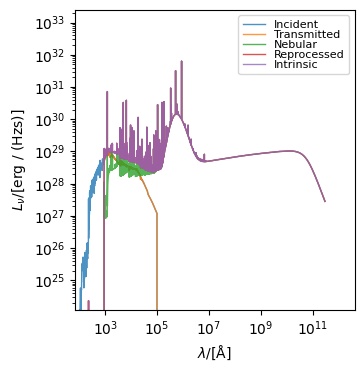

In [37]:
galaxy.stars.get_spectra_reprocessed(grid, fesc=0.0)
galaxy.stars.plot_spectra()

#### Stellar 

In [38]:
sed = galaxy.stars.spectra["incident"]
sed.measure_beta(window=(1250, 1750, 2250, 2750))

-2.911143434281315

#### Stellar + Nebular

In [39]:
sed = galaxy.stars.spectra["reprocessed"]
sed.measure_beta(window=(1250, 1750, 2250, 2750))

-2.4628318112742362

#### Just nebular

In [40]:
sed = galaxy.stars.spectra["nebular"]
sed.measure_beta(window=(1250, 1750, 2250, 2750))

-1.3818458524357808